In [3]:
%pylab inline
import re
import math
from collections import Counter
import requests

Populating the interactive namespace from numpy and matplotlib


In [4]:
TEXT = requests.get('https://norvig.com/big.txt').text

In [6]:
def tokens(text):
    return re.findall(r'[a-z]+',text.lower())

In [7]:
tokens('ti lox')

['ti', 'lox']

In [8]:
WORDS=tokens(TEXT)

In [10]:
def sample(bag,n=10):
    return " ".join(random.choice(bag) for _ in range(n))

In [15]:
sample(WORDS)

'so of convention it began with curled of he were'

In [17]:
Counter(tokens("sasi lox dibil!"))

Counter({'sasi': 1, 'lox': 1, 'dibil': 1})

In [16]:
COUNTS=Counter(WORDS)

In [19]:
for w in tokens(sample(WORDS)):
    print(COUNTS[w],w)

82 speech
21155 a
215 deep
38313 and
26 heroic
6643 on
5622 you
1 itinerant
40025 of
40025 of


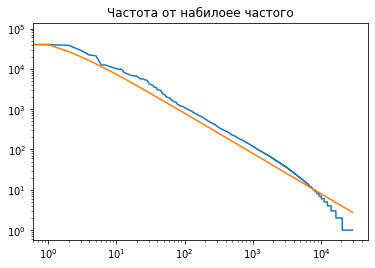

In [21]:
M=COUNTS['the']
yscale('log');
xscale('log');
title("Частота от набилоее частого")
plot([c for (w,c) in COUNTS.most_common()])
plot([M/i for i in range(1,len(COUNTS))])

Проверка правописания

In [68]:
def correct(word):
    candidates=(known(edits0(word)) or
               known(edits1(word)) or
               known(edits2(word)) or
               [word])
    return max(candidates, key=COUNTS.get)
    

In [69]:
def known(words):
    return [w for w in words if w in COUNTS]

In [70]:
def edits0(word):
    return {word}

In [71]:
def edits2(word):
    return {e2 for e1 in edits1(word) for e2 in edits1(e1)}

In [72]:
def edits1(word):
    "Возвращает список всех строк на расстоянии edit_distance == 1 от word."
    pairs      = splits(word)
    deletes    = [a+b[1:]           for (a, b) in pairs if b]
    transposes = [a+b[1]+b[0]+b[2:] for (a, b) in pairs if len(b) > 1]
    replaces   = [a+c+b[1:]         for (a, b) in pairs for c in alphabet if b]
    inserts    = [a+c+b             for (a, b) in pairs for c in alphabet]
    return set(deletes + transposes + replaces + inserts)

def splits(word):
    "Возвращает список всех возможных разбиений слова на пару (a, b)."
    return [(word[:i], word[i:]) for i in range(len(word)+1)]

alphabet = 'abcdefghijklmnopqrstuvwxyz'
    

In [74]:
correct("see")

'see'

In [77]:
list(map(correct,tokens("gurl hase hed acha")))

['girl', 'have', 'he', 'ache']

In [78]:
def correct_text(text):
    "Исправить все слова с опечатками в тексте."
    return re.sub('[a-zA-Z]+', correct_match, text)

def correct_match(match):
    "Исправить слово word в match-группе, сохранив регистр: upper/lower/title."
    word = match.group()
    return case_of(word)(correct(word.lower()))

def case_of(text):
    "Возвращает функцию регистра по тексту: upper, lower, title, или str."
    return (str.upper if text.isupper() else
            str.lower if text.islower() else
            str.title if text.istitle() else
            str)

In [79]:
correct_text("shee iss sik")

'she iss sir'

In [83]:
def pdist(counter):
    "Превращает частоты из Counter в вероятностное распределение."
    N = sum(list(counter.values()))
    return lambda x: counter[x]/N*100

P = pdist(COUNTS)

In [84]:
def Pwords(words):
    "Вероятности слов, при условии, что они независимы."
    return product(P(w) for w in words)

def product(nums):
    "Перемножим числа.  (Это как `sum`, только с умножением.)"
    result = 1
    for x in nums:
        result *= x
    return result

In [90]:
def memo(f):
    "Запомнить результаты исполнения функции f, чьи аргументы args должны быть хешируемыми."
    cache = {}
    def fmemo(*args):
        if args not in cache:
            cache[args] = f(*args)
        return cache[args]
    fmemo.cache = cache
    return fmemo

In [91]:
def splits(text, start=0, L=20):
    "Вернуть список всех пар (a, b); start <= len(a) <= L."
    return [(text[:i], text[i:]) 
            for i in range(start, min(len(text), L)+1)]

In [92]:
@memo
def segment(text):
    "Вернуть список слов, который является наиболее вероятной сегментацией нашего текста."
    if not text: 
        return []
    else:
        candidates = ([first] + segment(rest) 
                      for (first, rest) in splits(text, 1))
        return max(candidates, key=Pwords)

In [94]:
segment('choosespain')

['choose', 's', 'pain']

In [95]:
segment('speedofart')

['speed', 'of', 'art']